# Google Landmark Recognition Challenge

Competition information can be found at https://www.kaggle.com/c/landmark-recognition-challenge

This analysis is heavily based on https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)

Training data size (1225029, 3)
test data size (117703, 2)


In [5]:
train_data.head()

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231


In [6]:
test_data.head()

,id,url
0,000088da12d664db,https://lh3.googleusercontent.com/-k45wfamuhT8...
1,0001623c6d808702,https://lh3.googleusercontent.com/-OQ0ywv8KVIA...
2,0001bbb682d45002,https://lh3.googleusercontent.com/-kloLenz1xZk...
3,0002362830cfe3a3,https://lh3.googleusercontent.com/-N6z79jNZYTg...
4,000270c9100de789,https://lh3.googleusercontent.com/-keriHaVOq1U...


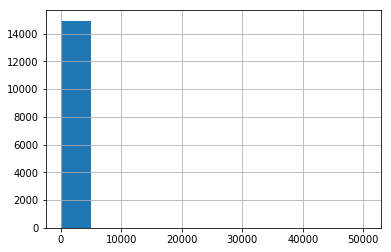

In [8]:
##Uniqueness of the landmark ids
train_data['landmark_id'].value_counts().hist()

In [9]:
# missing data in training data 
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
landmark_id,0,0.0
url,0,0.0
id,0,0.0


In [10]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
url,0,0.0
id,0,0.0


In [11]:
# Occurance of landmark_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.landmark_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,9633,50337
1,6051,50148
2,6599,23415
3,9779,18471
4,2061,13271
5,5554,11147
6,6651,9508
7,6696,9222


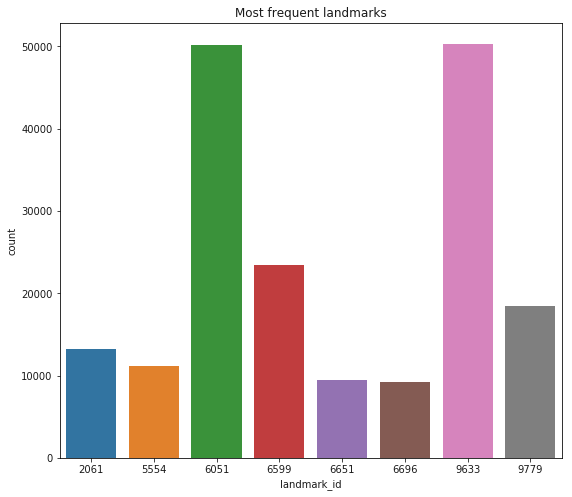

In [12]:
# Plot the most frequent landmark_ids
plt.figure(figsize = (9, 8))
plt.title('Most frequent landmarks')
sns.set_color_codes("pastel")
sns.barplot(x="landmark_id", y="count", data=temp,
            label="Count")
plt.show()

In [13]:
# Occurance of landmark_id in increasing order
temp = pd.DataFrame(train_data.landmark_id.value_counts().tail(8))
temp.reset_index(inplace=True)
temp.columns = ['landmark_id','count']
temp

,landmark_id,count
0,4753,1
1,6261,1
2,4144,1
3,1527,1
4,6025,1
5,4334,1
6,5865,1
7,8381,1


In [14]:
# Unique URL's
train_data.nunique()

id             1225029
url            1225029
landmark_id      14951
dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


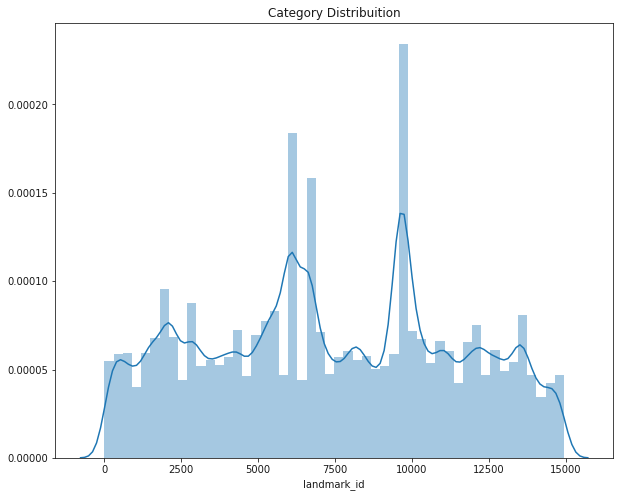

In [15]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['landmark_id'])

plt.show()

## Number of classes with less than K occurrences

In [49]:
##Number of unique classes
unique_labels = len(train_data['landmark_id'].unique())

#Less than 5

print("Number of classes under 10 occurences",
      (train_data['landmark_id'].value_counts() <= 10).sum(),
      'out of total number of categories',unique_labels)

#Less than 20

print("Number of classes between 11 and 20 occurences",
      (train_data['landmark_id'].value_counts().between(11,20)).sum(),
      'out of total number of categories',unique_labels)

# more than 20

print("Number of classes over 20 occurences",
      (train_data['landmark_id'].value_counts() > 20).sum(),
      'out of total number of categories',unique_labels)



Number of classes under 10 occurences 6559 out of total number of categories 14951
Number of classes between 11 and 20 occurences 2238 out of total number of categories 14951
Number of classes over 20 occurences 6154 out of total number of categories 14951


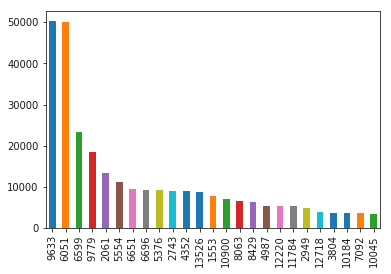

In [69]:
train_data['landmark_id'].value_counts().head(25).plot(kind='bar')

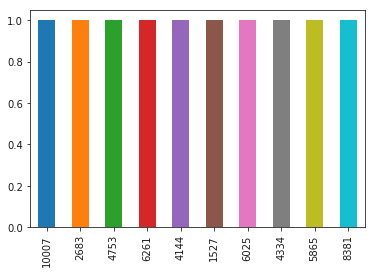

In [41]:
train_data['landmark_id'].value_counts().tail(10).plot(kind='bar')

In [37]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

In [46]:
category = train_data['landmark_id'].value_counts().keys()[2]
urls = train_data[train_data['landmark_id'] == category]['url']
display_category(urls, "")